float64


['Cr',
 'In',
 'La',
 'Yb',
 'Bi',
 'Ag',
 'Cu',
 'Sm',
 'Ga',
 'Sr',
 'K',
 'Li',
 'Ta',
 'Ca',
 'Ce',
 'Y',
 'Ni',
 'Ba',
 'Sb',
 'H',
 'Zn',
 'Sn',
 'Co',
 'Mn',
 'Na']

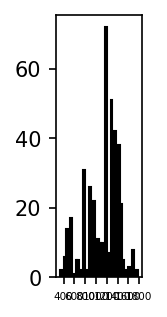

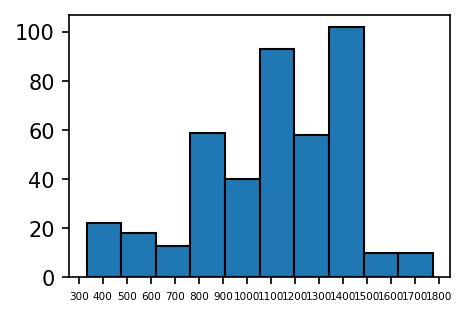

In [3]:
%matplotlib inline
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from pylab import *
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
from sklearn import linear_model

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.naive_bayes import GaussianNB
from collections import OrderedDict
from sklearn import mixture
from sklearn import cluster, preprocessing, mixture 
#　データセット読み込み
df = pd.read_csv('Perovskite_Water_Splitting_Dup.csv')
df = df.rename(columns={'B1_mole': 'B1 mole'})
df_per = pd.read_csv('periodictable.csv')
#　列の取り出しかつ、nanを0に置き換え
#df['CalcT'] = df['CalcT'].fillna(value = 0)

#　列の取り出しかつ、nanを削除
#df['CalcT'] = df['CalcT'].dropna()
print(df['CalcT'].dtype)

# nanを置き換えた0を除く*重複した行は全部消える。sortは行番号と値を表示してくれる。
#df[df['CalcT'] > 0]['CalcT'].drop_duplicates().sort_values(ascending = False)

#df[df['CalcT'] > 0]['CalcT'].drop_duplicates().sort_values(ascending = False)

#figureとaxesを作ってヒストグラムを作成
fig, ax = subplots(1, 1, figsize = (1, 2), dpi = 150, constrained_layout = True)
ax.hist(df['CalcT'],bins = 40, edgecolor = 'black')

#x軸の目盛りのサイズを指定
ax.tick_params(axis = "x", labelsize = 5)
#目盛りの幅を指定
ax.xaxis.set_major_locator(MultipleLocator(200))

#df_1 = df_1.astype(str)
#fig1 = plt.figure(tight_layout = True)
#ax = fig1.subplots()
#ax = plt.hist(df_1)
#ax.tick_params(axis = "x", fontsize = 8)

fig, ax = subplots(1, 1, figsize = (3, 2), dpi = 150, constrained_layout = True)
ax.hist(df[df['CalcT'] > 0]['CalcT'], edgecolor = 'black')
ax.tick_params(axis = "x", labelsize = 5)
ax.xaxis.set_major_locator(MultipleLocator(100))

#his = plt.hist(df_1,bins = 5)
#plt.tick_params(width = 2, length = 10)
#his.set_xlabel("x", size = 14, weight = "light")

li = list(set(list(df['A'].dropna()) + list(df['A1'].dropna()) + list(df['A2'].dropna())))
li

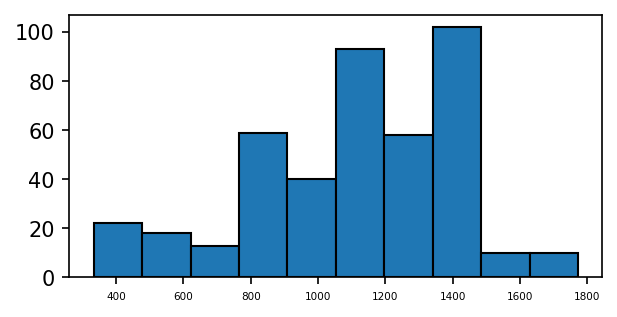

In [3]:
#df[df['CalcT'] > 0]['CalcT'].drop_duplicates().sort_values(ascending = False)
df[df['CalcT'] > 0]['CalcT'].sort_values(ascending = False)
fig, ax = subplots(1, 1, figsize = (4, 2), dpi = 150, constrained_layout = True)
ax.hist(df[df['CalcT'] > 0]['CalcT'], edgecolor = 'black')
ax.tick_params(axis = "x", labelsize = 5)

In [25]:
df['CalcT'].drop_duplicates().sort_values()

8         0.0
156     333.0
493     413.0
486     453.0
499     473.0
356     543.0
437     603.0
180     623.0
240     643.0
214     673.0
129     723.0
6       743.0
380     770.0
21      773.0
131     823.0
98      873.0
133     923.0
99      973.0
135    1023.0
100    1073.0
386    1123.0
382    1150.0
2      1173.0
233    1223.0
1      1273.0
381    1350.0
0      1373.0
312    1400.0
225    1420.0
30     1423.0
373    1470.0
164    1473.0
313    1498.0
34     1573.0
318    1623.0
329    1673.0
36     1773.0
Name: CalcT, dtype: float64

34
['Na', 'Sr', 'K', 'Bi', 'Zn', 'La', 'Ca', 'Ba', 'Sb', 'Li', 'Y', 'Cu', 'In', 'Ag', 'Co', 'Mn', 'Ga', 'Sm', 'Ni', 'Cr'] [134, 106, 51, 50, 44, 41, 29, 23, 13, 11, 11, 7, 6, 4, 3, 2, 2, 1, 1, 1]


[Text(0.5, 0, '')]

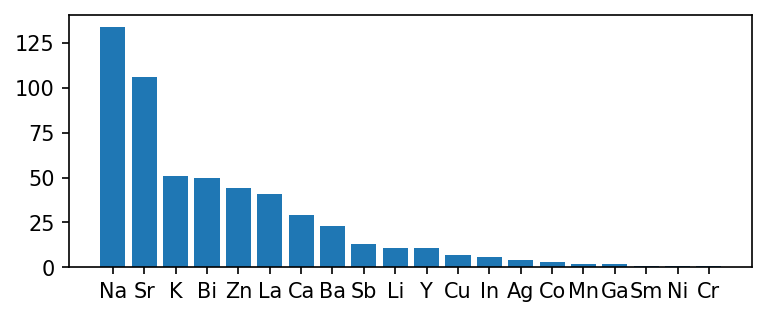

In [16]:
#print(df.iloc[1:25,:])
col_lis = df.columns.tolist()
print(len(col_lis))
#for i in col_lis:
#    print(i)
#print(df['A'].value_counts())
#fig, ax = subplots(1, 1, figsize = (5, 2), dpi = 150, constrained_layout = True)
dtype(df['A'].value_counts())
lis = list(df['A'].value_counts())
df['A'].value_counts()
lis1 = []
lis2 = []
for index, value in df['A'].value_counts().iteritems():
    lis1.append(index)
    lis2.append(value)
print(lis1,lis2)
lis3 = list(range(len(lis1)))
fig, ax = subplots(1, 1, figsize = (5, 2), dpi = 150, constrained_layout = True)
ax.bar(lis3, lis2, tick_label=lis1, align="center")
ax.set(xlabel = '')

In [74]:
for i in ["A", "A1", "A2", "B", "B1", "B2"]:
    print(df[i].dropna().shape[0])
    #print(df[i].value_counts())
    #df["A1"].dropna()

540
167
23
540
148
7


['Ref', 'A', 'A1', 'A2', 'B', 'B1', 'B2', 'X', 'X1', 'A mole', 'A1 mole', 'A2 mole', 'B mole', 'B1 mole', 'B2 mole', 'X mole', 'X1 mole', 'Prep Meth', 'CalcT', 'Calc', 'Prom Meth', 'Promoter', 'Prom', 'Crystal', 'BandGap', 'Surface Area', 'CatW', 'Alcohol%', 'Sac. Agent1', 'Sac. Agent2', 'Light', 'Power', 'Wave', 'ProdRate']


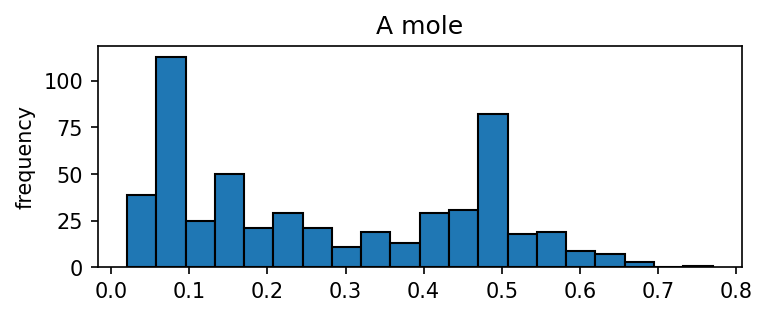

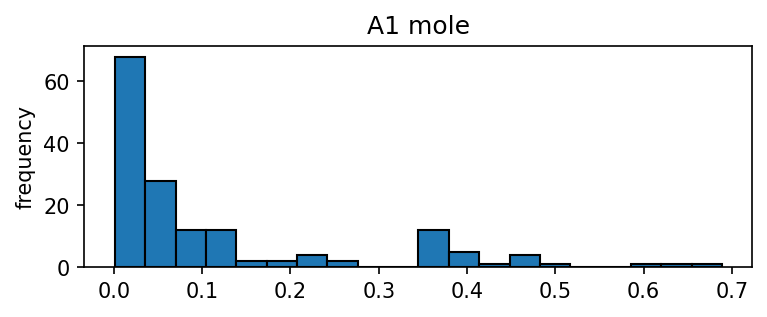

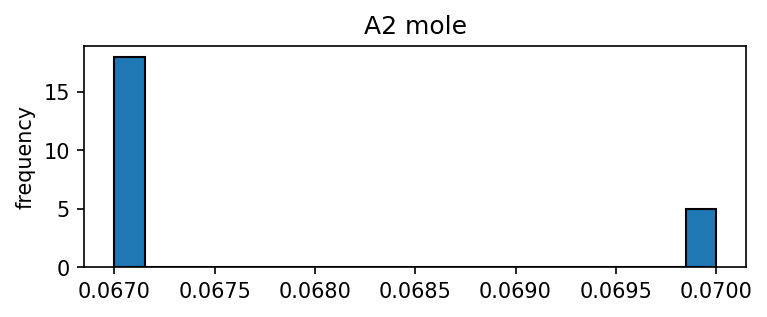

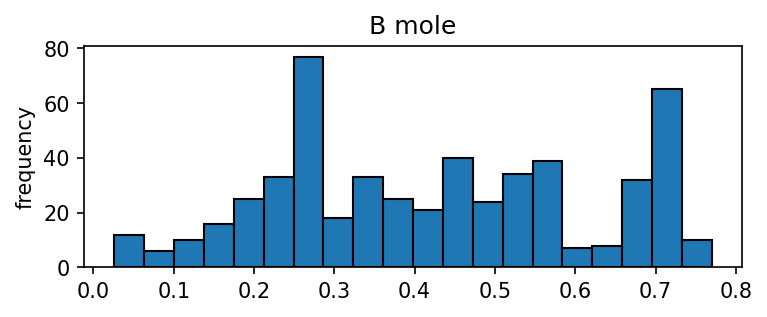

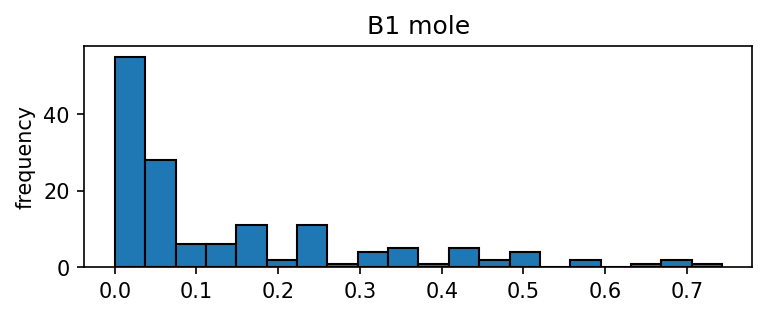

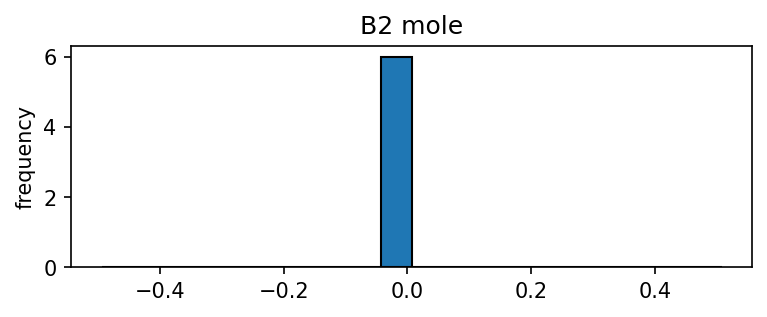

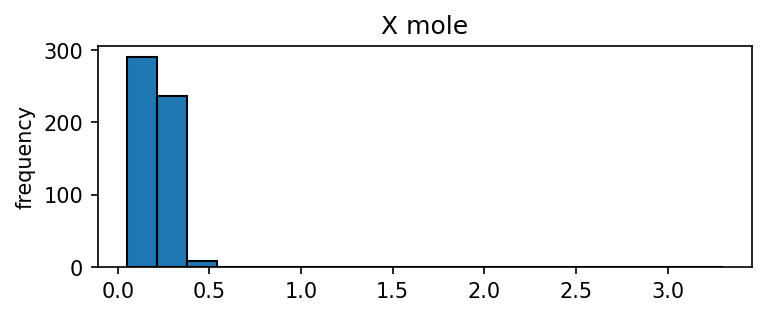

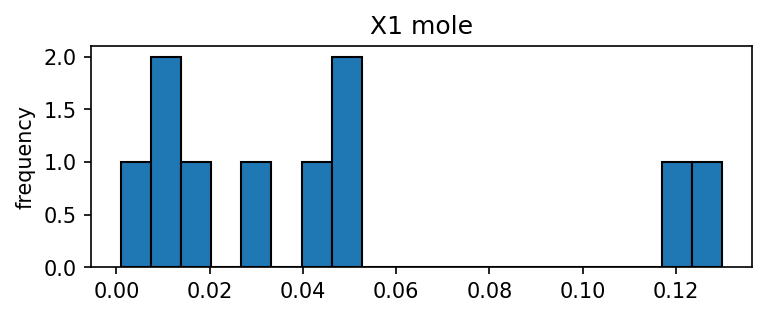

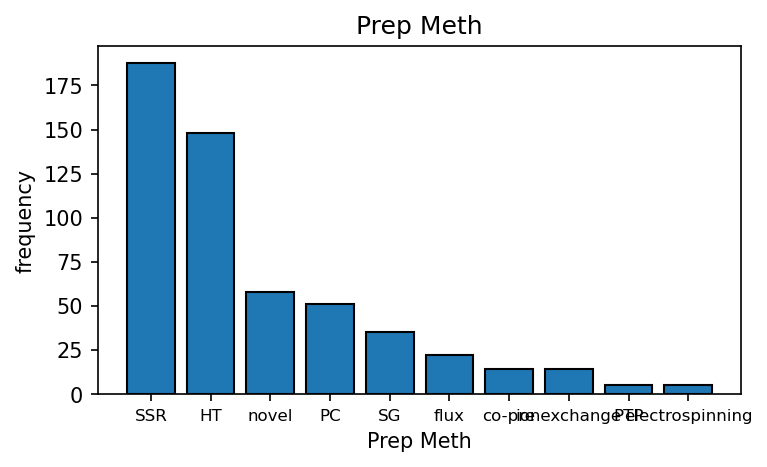

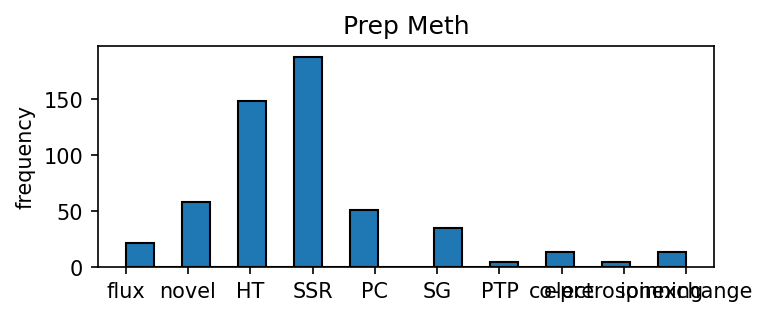

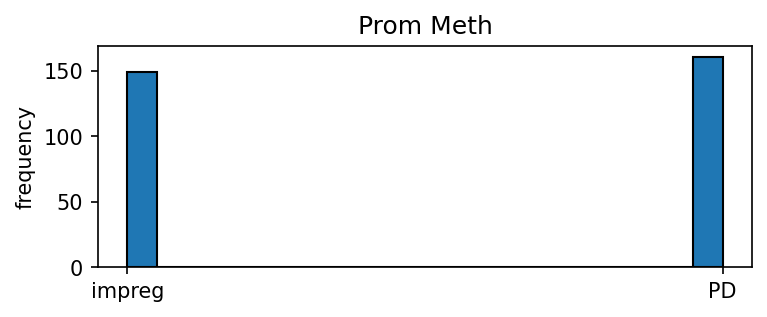

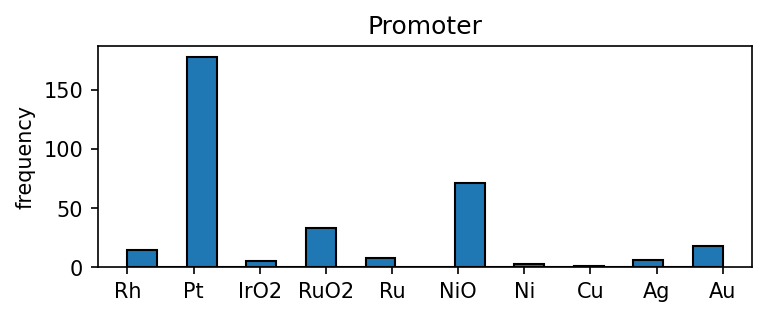

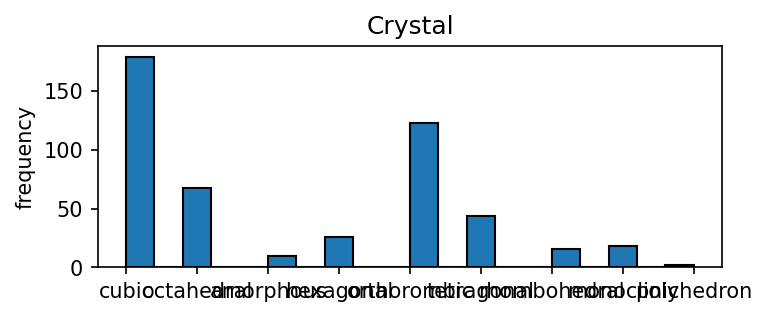

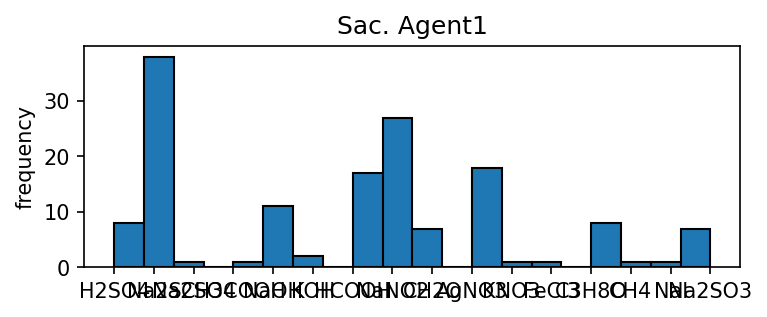

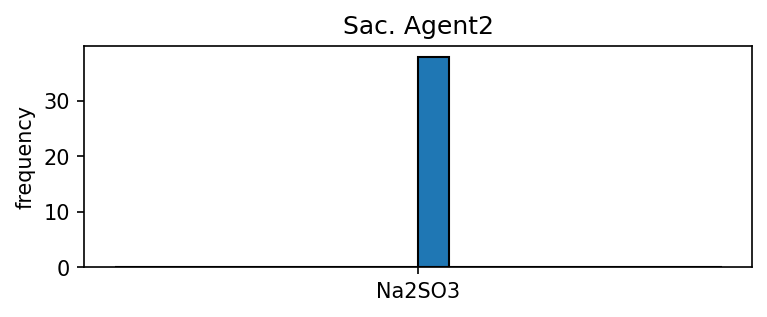

In [39]:
def analysis_plot(df, column_name, plot_type,):
    if plot_type == bar:
        lis1 = []
        lis2 = []
        for index, value in df[column_name].dropna().value_counts().iteritems():
            lis1.append(index)
            lis2.append(value)
        lis3 = list(range(len(lis1)))
        fig, ax = subplots(1, 1, figsize = (5, 3), dpi = 150, constrained_layout = True)
        ax.bar(lis3, lis2, tick_label=lis1, align="center",edgecolor = 'black')
        #x軸の目盛りのサイズを指定
        ax.tick_params(axis = "x", labelsize = 8)
        #軸のラベル及び、タイトル設定
        ax.set(xlabel = column_name, ylabel = 'frequency',title = column_name)
    
    if plot_type == hist:
        fig, ax = subplots(1, 1, figsize = (5, 2), dpi = 150, constrained_layout = True)
        df[column_name].describe()
        bins = len(set(df[column_name].dropna()))
        ax.hist(df[column_name].dropna(), bins = 20, edgecolor = 'black')
        ax.set( ylabel = 'frequency',title = i )
        
        
        
lis1 = ["A", "A1", "A2", "B", "B1", "B2","X","X1"]
lis2 = ["A mole","A1 mole","A2 mole","B mole","B1_mole","B2 mole","X mole","X1 mole"]
lis3 = ['Prep Meth','Prom Meth','Promoter','Crystal', 'Sac. Agent1', 'Sac. Agent2']
###########各サイトの原子のデータ数######
#lis1 = ["A", "A1", "A2", "B", "B1", "B2","X","X1"]

#for i in lis1:
    #analysis_plot(df, i, bar)
    
    
###########各サイトのの質量%のデータ数###########
lis2 = ["A mole","A1 mole","A2 mole","B mole","B1 mole","B2 mole","X mole","X1 mole"]
for i in lis2:
    analysis_plot(df, i, hist)
    
    
###########準備方法と焼成温度及び時間#
analysis_plot(df,'Prep Meth', bar)
lst3 = ['CalcT', 'Calc']
for i in lis3:
    analysis_plot(df, i, hist)


    
print(list(df.columns))

(array([45., 36., 15.,  7., 10.,  7.,  2.,  2.,  0.,  3.,  1.,  2.,  0.,
         0.,  0., 12.,  0.,  5.,  1.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,
         1.,  1.,  0.,  1.]),
 array([0.001     , 0.02393333, 0.04686667, 0.0698    , 0.09273333,
        0.11566667, 0.1386    , 0.16153333, 0.18446667, 0.2074    ,
        0.23033333, 0.25326667, 0.2762    , 0.29913333, 0.32206667,
        0.345     , 0.36793333, 0.39086667, 0.4138    , 0.43673333,
        0.45966667, 0.4826    , 0.50553333, 0.52846667, 0.5514    ,
        0.57433333, 0.59726667, 0.6202    , 0.64313333, 0.66606667,
        0.689     ]),
 <BarContainer object of 30 artists>)

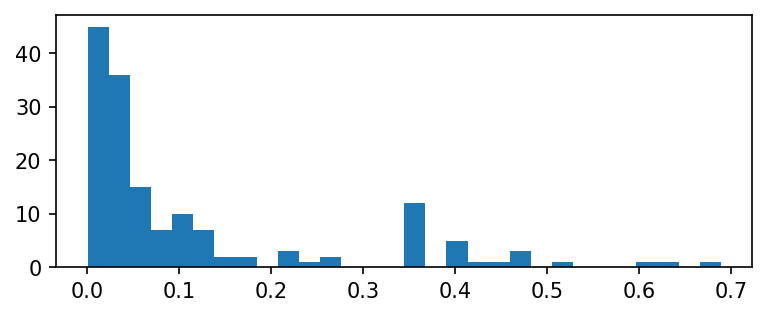

In [105]:
fig, ax = subplots(1, 1, figsize = (5, 2), dpi = 150, constrained_layout = True)
df['A mole'].describe()
bins = len(set(df['A mole'].dropna()))
ax.hist(df['A1 mole'].dropna(),bins = 30)

(array([ 2., 10.,  0.,  0.,  2.,  2.,  2.,  4.,  2.,  2.,  1., 11.,  1.,
         1.,  3.,  0., 61.,  0.,  0.,  2.]),
 array([0.048  , 0.07355, 0.0991 , 0.12465, 0.1502 , 0.17575, 0.2013 ,
        0.22685, 0.2524 , 0.27795, 0.3035 , 0.32905, 0.3546 , 0.38015,
        0.4057 , 0.43125, 0.4568 , 0.48235, 0.5079 , 0.53345, 0.559  ]),
 <BarContainer object of 20 artists>)

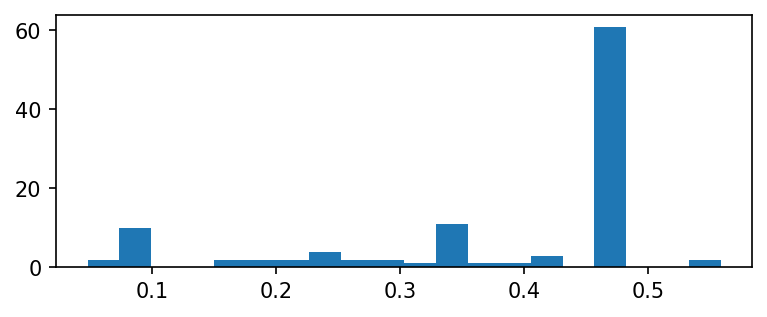

In [19]:
#set1 = set(list(df["A"]))
#set2 = list(np.arange(len(set1)))
#pd.DataFrame({"met" : list(set1)})
df[df["A"] == "Sr"]["A mole"]
fig, ax = subplots(1, 1, figsize = (5, 2), dpi = 150, constrained_layout = True)
#bins = len(set(df['A mole'].dropna()))
ax.hist(df[df["A"] == "Sr"]["A mole"],bins = 20)
#df1[df1["A"] == "Sr" or df1["A1"] == "Sr" or df1["A2"] == "Sr"]

In [82]:
#####金属ごとの各質量％のデータ量がみたい
#####まず実験・Sr
df
df1 = df[df.loc[:,"A"] == "Sr"].loc[:,"A mole"]
df2 = df[df.loc[:,"A1"] == "Sr"].loc[:,"A1 mole"]
df3 = df[df.loc[:,"A2"] == "Sr"].loc[:,"A2 mole"]
serise_Sr = pd.concat([df1,df2,df3])


######histgramの描画
#fig, ax = subplots(1, 1, figsize = (3, 3), tight_layout = True)
#ax.hist(df_derive['Sr'], bins = 20, edgecolor = 'black')
#ax.set(xlabel = column_name, ylabel = 'frequency', title = 'Sr distribution')


######colimn nemeが金属、wt%がデータのDataFrameがほしい

df1 = df[df.loc[:,"A"] == "Zn"].loc[:,"A mole"]
df2 = df[df.loc[:,"A1"] == "Zn"].loc[:,"A1 mole"]
df3 = df[df.loc[:,"A2"] == "Zn"].loc[:,"A2 mole"]
series_Zn = pd.concat([df1,df2,df3])

######各金属のシリーズを得る

col_dic = {"A":"A mole", "A1":"A1 mole", "A2":"A2 mole"}
col_lis = ["A", "A1", "A2"]
met_lis = list(set(list(df['A'].dropna()) + list(df['A1'].dropna()) + list(df['A2'].dropna())))

def met_series(df, met_name):
    ser1 = df[df.loc[:,"A"] == met_name].loc[:,"A mole"]
    ser2 = df[df.loc[:,"A1"] == met_name].loc[:,"A1 mole"]
    ser3 = df[df.loc[:,"A2"] == met_name].loc[:,"A2 mole"]
    pd_metal = pd.concat([ser1,ser2,ser3])

#ser1 = df[df.loc[:,"A"] == met_name].loc[:,"A mole"]
#ser2 = df[df.loc[:,"A1"] == met_name].loc[:,"A1 mole"]
#ser3 = df[df.loc[:,"A2"] == met_name].loc[:,"A2 mole"]
#metal_dic[met_name] = pd.concat([ser1,ser2,ser3]) 
    
    
#####先に金属名で判別できるリスト(dictionary)を作っとけばいい
def make_DataFrame(df, met_lis, site_list):

    
    ###### metal_dict:{金属名:金属のwt%のシリーズ}のdictionary ←　結局これがほしい
    ###### col_dic   :{サイト名：対応する列}のdictionary
    ###### site_dict :{サイト：指定した金属がサイトに入っているときのwt%のシリーズ}
    ###### series_lis:一時的に3つor２つのseriesを保持するリスト
    
    metal_dic = {}
    col_dic = {"A":"A mole", "A1":"A1 mole", "A2":"A2 mole",
                  "B":"B mole", "B1":"B1 mole", "B2":"A2 mole",
                  "X":"X mole", "X1":"X1 mole",}
    for met_name in met_lis:
        site_dic = {}
        series_lis = []
        for site in site_list:
            site_dic[site] = df[df.loc[:,site] == met_name].loc[:,col_dic[site]]
            series_lis.append(site_dic[site])
        metal_dic[met_name] = pd.concat(series_lis)    
    return metal_dic


In [5]:
met_lis = list(set(list(df['A'].dropna()) + list(df['A1'].dropna()) + list(df['A2'].dropna())))
dic1 = make_DataFrame(df, met_lis, ["A","A1","A2"])

dic1
#fig, ax = subplots(1, 1, figsize = (3, 3), tight_layout = True)
#for i in met_lis:
    #for a, b in zip
    #ax[][].hist(dic1[i], bins = 20, edgecolor = 'black')
    #ax[][].set(xlabel = 'wt% of '+i, ylabel = 'frequency', title = i+' distribution')
    
    
#fig, ax = subplots(1, 1, figsize = (3, 3), tight_layout = True)
#ax.hist(dic1['Sr'], bins = 20, edgecolor = 'black')
#ax.set(xlabel = 'wt% of Sr', ylabel = 'frequency', title = 'Sr distribution')
#len(lis)

{'Cr': 451    0.020
 383    0.006
 403    0.014
 444    0.014
 448    0.001
 dtype: float64,
 'In': 179    0.150
 223    0.320
 224    0.320
 386    0.199
 387    0.240
 388    0.299
 dtype: float64,
 'La': 158    0.32
 159    0.28
 160    0.26
 161    0.25
 162    0.23
        ... 
 184    0.07
 185    0.07
 186    0.07
 187    0.07
 188    0.07
 Length: 84, dtype: float64,
 'Yb': 206    0.46
 211    0.46
 dtype: float64,
 'Bi': 113    0.490
 114    0.490
 115    0.490
 116    0.490
 117    0.490
 143    0.770
 164    0.500
 165    0.470
 166    0.530
 184    0.410
 185    0.410
 186    0.410
 187    0.410
 188    0.410
 189    0.410
 190    0.410
 191    0.410
 192    0.410
 193    0.410
 194    0.430
 195    0.430
 196    0.430
 197    0.430
 198    0.430
 199    0.390
 200    0.390
 201    0.390
 202    0.390
 203    0.390
 233    0.592
 234    0.592
 235    0.592
 236    0.592
 237    0.592
 238    0.592
 250    0.460
 251    0.462
 252    0.463
 253    0.446
 254    0.465
 255   

{'tetragonal': 'red', 'monoclinic': 'blue', 'octahedral': 'black', 'rhombohedral': 'green', 'cubic': 'orange', 'hexagonal': 'purple', 'polyhedron': 'fuchsia', 'amorphous': 'yellow', 'orthorombic': 'cyan'}
Index(['Unnamed: 0', 'Ref', 'A', 'A1', 'A2', 'B', 'B1', 'B2', 'X', 'X1',
       'A mole', 'A1 mole', 'A2 mole', 'B mole', 'B1 mole', 'B2 mole',
       'X mole', 'X1 mole', 'Prep Meth', 'CalcT(K)', 'Calc time(h)',
       'Prom Meth', 'Promoter', 'Prom %w', 'Crystal', 'BandGap(eV)',
       'Surface Area(m2/g)', 'CatW', 'Alcohol%', 'Sac. Agent1', 'Sac. Agent2',
       'Light type', 'Power(W)', 'Wave length(<nm)', 'ProdRate(μmol/gh)',
       'Label'],
      dtype='object')


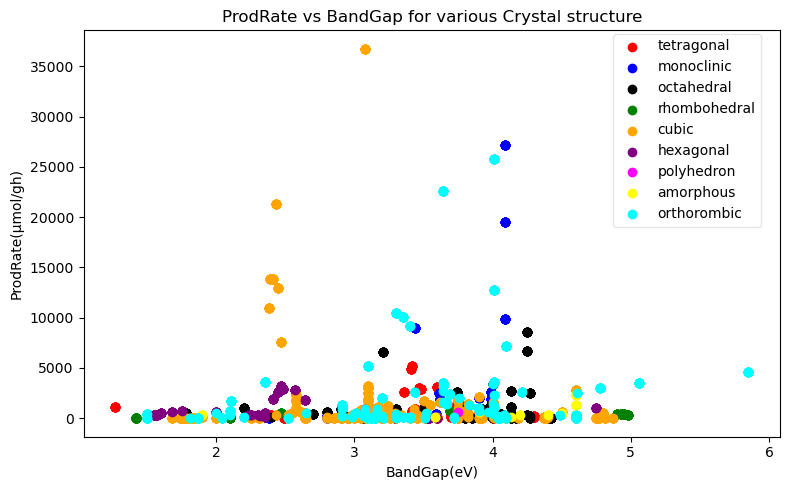

In [71]:
######

#fig, ax = plt.subplots(1, 1, figsize  = (5,5), dpi = 100, tight_layout = True)
#ax.scatter(df[df['Crystal'] == 'cubic']['BandGap'],df[df['Crystal'] == 'cubic']['ProdRate'], marker = '^', c = 'r')
#ax.scatter(df[df['Crystal'] == 'polyhedron']['BandGap'],df[df['Crystal'] == 'polyhedron']['ProdRate'],
           #marker = '^', c = 'black')

######結晶構造と色を対応させた辞書を作る
Crystal_lis = list(set(df['Crystal'].dropna()))
color_lis = ['red','blue','black', 'green', 'orange','purple','fuchsia','yellow','cyan']
dic_CrVSCo = {}
for i in Crystal_lis:
    dic_CrVSCo[i] = color_lis[Crystal_lis.index(i)]
    
print(dic_CrVSCo)
df = pd.read_csv('Perovskite_Water_Splitting.csv')
print(df.columns)
fig, ax = plt.subplots(1, 1, figsize  = (8,5), dpi = 100, tight_layout = True)
for Crystal_name in Crystal_lis:
    ax.scatter(df[df['Crystal'] == Crystal_name]['BandGap(eV)'],
               df[df['Crystal'] == Crystal_name]['ProdRate(μmol/gh)'],
               marker = 'o',
               c = dic_CrVSCo[Crystal_name])
    scatters = [ax.scatter(df[df['Crystal'] == Crystal_name]['BandGap(eV)'],
               df[df['Crystal'] == Crystal_name]['ProdRate(μmol/gh)'],
               marker = 'o',
               c = dic_CrVSCo[Crystal_name]) for Crystal_name in Crystal_lis]
    ax.legend(handles = scatters,
              labels = [Crystal_name for Crystal_name in Crystal_lis],
              framealpha = 0.5,
              loc = "lower left",
              
              bbox_to_anchor =(0.75, 0.5, 0.1, 0.19))
    ax.set(xlabel = 'BandGap(eV)', ylabel = 'ProdRate(μmol/gh)',title = 'ProdRate vs BandGap for various Crystal structure')

#print(list(set(df['Crystal'].dropna())))
#df.columns

In [84]:
#######pairwise correlation　を作る
#######原子と原子番号を対応させる
df.corr()
met_lis = list(set(list(df['A'].dropna()) + list(df['A1'].dropna()) + list(df['A2'].dropna())))
met_lis
atom_num_dic = {0:0}
atom_num_dic

#######原子と原子番号を対応させる
(list(df_per.columns))
df_atom_num = df_per.iloc[:,0:2]
atom_num_dic[df_per.iloc[:,0][1]] = df_per.iloc[:,1][1]
atom_num_dic
for i in range(len(list(df_per.iloc[:,0]))):
    atom_num_dic[df_per.iloc[:,0][i]] = df_per.iloc[:,1][i]
atom_num_dic

#######原子を原子番号で置き換えたい →原子番号の列を作る
df = pd.read_csv('Perovskite_Water_Splitting_Dup.csv')
df = df.rename(columns={'B1_mole': 'B1 mole'})
col_name = list(df.columns)
atom_num_dic[df.loc[1,'A']]

col_dic = {"A":["A mole",'A\'s num'], "A1":["A1 mole",'A1\'s num'], "A2":["A2 mole",'A2\'s num'],
           "B":["B mole",'B\'s num'], "B1":["B1 mole",'B1\'s num'], "B2":["B2 mole",'B2\'s num'],
           "X":["X mole",'X\'s num'], "X1":["X1 mole",'X1\'s num'], }

pairwise_columns_lis = list(df.columns)[1:9]
pairwise_columns_lis.append('BandGap')


df1 = df.loc[:,pairwise_columns_lis].fillna(value = 0)    
for columns in list(df.columns)[1:9]:
    #print(columns)
    df1.insert(col_name.index(columns)+1,
              col_dic[columns][1],
              [atom_num_dic[df1.loc[i,columns]] for i in range(540)])

df1.corr()

,A's num,A1's num,A2's num,B's num,B1's num,B2's num,X's num,X1's num,BandGap
A's num,1.000000,0.089570,0.037705,-0.138956,0.005383,0.021773,-0.051980,0.035578,-0.095834
A1's num,0.089570,1.000000,0.089112,0.048789,0.024616,-0.060843,-0.083564,-0.053229,0.033808
A2's num,0.037705,0.089112,1.000000,0.231942,-0.109493,-0.023746,-0.074626,-0.026906,0.194554
B's num,-0.138956,0.048789,0.231942,1.000000,-0.031660,-0.152348,-0.136553,0.052776,0.470106
B1's num,0.005383,0.024616,-0.109493,-0.031660,1.000000,0.202264,-0.144423,0.072115,-0.047929
B2's num,0.021773,-0.060843,-0.023746,-0.152348,0.202264,1.000000,-0.041273,-0.014881,-0.043059
X's num,-0.051980,-0.083564,-0.074626,-0.136553,-0.144423,-0.041273,1.000000,-0.046766,-0.464572
X1's num,0.035578,-0.053229,-0.026906,0.052776,0.072115,-0.014881,-0.046766,1.000000,-0.130211
BandGap,-0.095834,0.033808,0.194554,0.470106,-0.047929,-0.043059,-0.464572,-0.130211,1.000000


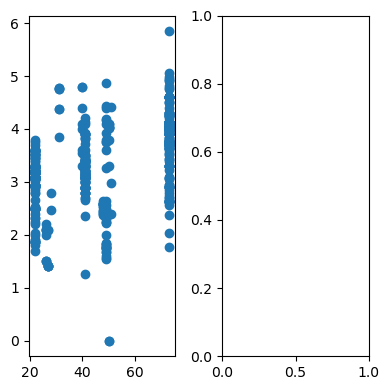

In [85]:
fig, ax = plt.subplots(1, 2, figsize = (4,4), dpi = 100, tight_layout = True)
ax[0].scatter(df1['B\'s num'],df1["BandGap"])

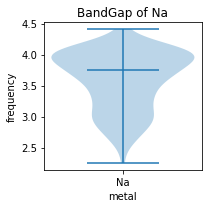

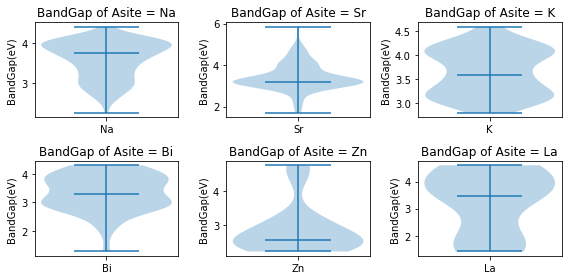

In [75]:
###### Aサイトが、のときのバンドギャップの分布がみたい
df_Na = df[df['A'] == 'Na']
df_Na.loc[:,['A','Crystal','BandGap(eV)','ProdRate(μmol/gh)']].dropna()
    

lis = ['Na', 'Sr', 'K', 'Bi', 'Zn', 'La']    
    
fig, ax = subplots(1, 1, figsize = (3, 3), tight_layout = True)
ax.violinplot(df_Na.loc[:,'BandGap(eV)'].dropna(), [1], showmedians=True)
ax.set(xlabel = "metal", ylabel = 'frequency', title = 'BandGap of Na')
ax.set_xticks([1], labels = ['Na'])



#一気に表示させたい
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = subplots(2, 3, figsize = (8, 4), tight_layout = True)
dic = {}
for i in lis:
    dic[i] = (df[df['A'] == i])
dic2 = {'Na':ax1, 'Sr':ax2, 'K':ax3, 'Bi':ax4, 'Zn':ax5, 'La':ax6}
for i in lis:
    dic2[i].violinplot(dic[i].loc[:,'BandGap(eV)'].dropna(), [1], showmedians=True)
    dic2[i].set(xlabel = None, ylabel = 'BandGap(eV)', title = 'BandGap:Asite = '+ i)
    dic2[i].set_xticks([1], labels = [i])


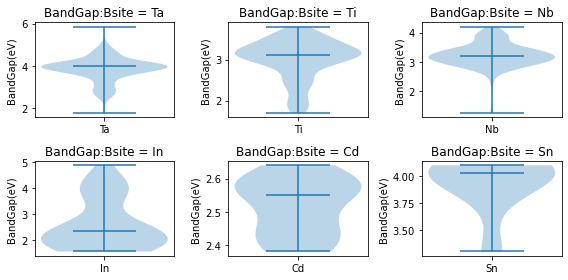

In [77]:
######Bサイトでも同じようにしてみる
lis =['Ta', 'Ti', 'Nb', 'In', 'Cd','Sn']
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = subplots(2, 3, figsize = (8, 4), tight_layout = True)
dic = {}
for i in lis:
    dic[i] = (df[df['B'] == i])
dic2 = {'Ta':ax1, 'Ti':ax2, 'Nb':ax3, 'In':ax4, 'Cd':ax5, 'Sn':ax6}
for i in lis:
    dic2[i].violinplot(dic[i].loc[:,'BandGap(eV)'].dropna(), [1], showmedians=True)
    dic2[i].set(xlabel = None, ylabel = 'BandGap(eV)', title = 'BandGap:Bsite = '+ i)
    dic2[i].set_xticks([1], labels = [i])

327
328


<IPython.core.display.Javascript object>


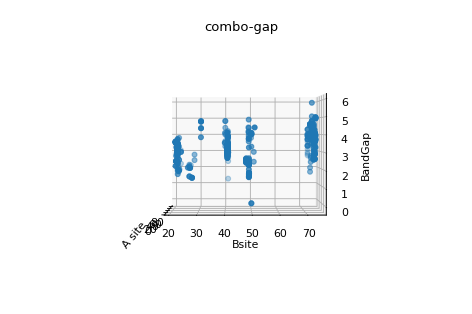

In [80]:
###### Xaxis = Asite(原子番号順),Yaxsis = Bsite(原子番号順),Zaxis = bandgap,の3次元プロット
%matplotlib notebook
from mpl_toolkits import mplot3d

atom_num_dic ={}
df_atom_num = df_per.iloc[:,0:2]
atom_num_dic[df_per.iloc[:,0][1]] = df_per.iloc[:,1][1]
atom_num_dic
for i in range(len(list(df_per.iloc[:,0]))):
    atom_num_dic[df_per.iloc[:,0][i]] = df_per.iloc[:,1][i]
#atom_num_dic

df1 = df.loc[:,['A','B','BandGap(eV)']]



####### zdataを作る
df2 = df['BandGap(eV)'].dropna()
for i in range(540):
    if i in df2.index:
        None
    else:
        print(i)
lisz = [df['BandGap(eV)'].fillna(0)]


###### Xdata ,ydataを作る
lisx = [atom_num_dic[i] for i in df['A'] ]
lisy = [atom_num_dic[i] for i in df['B'] ]
lisxn = [set(df['A'])]
lisyn = [df['B']]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(lisx,lisy,lisz, )
ax.set(xlabel = "A site", ylabel = "Bsite", zlabel = 'BandGap', title = 'combo-gap')
#ax.set_xlabel("X-axis")
#ax.set_ylabel("Y-axis")
#ax.set_zlabel("Z-axis")
ax.invert_xaxis()

<IPython.core.display.Javascript object>


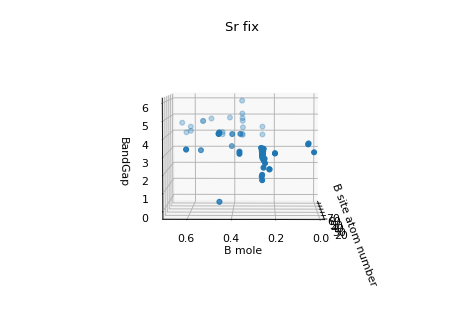

,B's num,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,CalcT,Calc,Prom,BandGap,Surface Area,CatW,Alcohol%,Power,Wave,ProdRate
B's num,1.000000,-0.721729,0.497827,NaN,0.719772,0.403482,NaN,-0.642241,NaN,0.075899,-0.174568,-0.093730,0.782209,-0.099141,-0.005243,-0.233221,-0.170102,0.074566,0.431583
A mole,-0.721729,1.000000,-0.724588,NaN,-0.499815,-0.512274,NaN,0.673281,NaN,-0.028937,0.205092,-0.072371,-0.588826,-0.008135,0.121576,0.224787,0.207822,-0.045843,-0.363414
A1 mole,0.497827,-0.724588,1.000000,NaN,-0.230672,0.662473,NaN,-0.933892,NaN,0.000777,-0.670245,0.436234,0.595779,-0.399587,-0.329408,-0.349671,0.162563,0.125584,0.303317
A2 mole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B mole,0.719772,-0.499815,-0.230672,NaN,1.000000,-0.313259,NaN,-0.274315,NaN,0.073856,-0.109646,-0.047502,0.510211,-0.002883,0.022933,-0.195290,-0.090566,-0.152200,0.248234
B1 mole,0.403482,-0.512274,0.662473,NaN,-0.313259,1.000000,NaN,-0.371119,NaN,0.044026,0.209780,-0.090071,0.241727,-0.063804,-0.004829,-0.011179,-0.424190,0.090111,0.330419
B2 mole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X mole,-0.642241,0.673281,-0.933892,NaN,-0.274315,-0.371119,NaN,1.000000,NaN,-0.092781,0.167456,0.032371,-0.678773,0.299398,0.208549,0.221443,-0.063557,-0.119513,-0.182556
X1 mole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CalcT,0.075899,-0.028937,0.000777,NaN,0.073856,0.044026,NaN,-0.092781,NaN,1.000000,-0.100391,0.149821,0.147599,-0.242666,0.233033,-0.395404,-0.071148,0.355282,-0.194100


In [87]:
######  Aサイトの原子を固定してBサイトの原子とAに対するwt%を変えて、バンドギャップを見る
df
######  Aサイトの金属で抽出
df1 = df[df['A'] == 'Sr']
lis = [i for i in df1['B']]
######   Bサイトの金属の原子番号を挿入

df1.insert(col_name.index('B')+1,
           col_dic['B'][1],
           [atom_num_dic[i] for i in df1['B']])



df1
set(list(df1['B mole'].isnull()))
list(df1['B mole'].isnull()).count(True)
#df1.corr()
lisz = [df1['BandGap'].fillna(0)]
lisx = [df1[col_dic['B'][1]]]
lisy = [df1[col_dic['B'][0]]]
len(lisx) == len(lisy) == len(lisz)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(lisx,lisy,lisz, )
ax.set(xlabel = 'B site atom number', ylabel = col_dic['B'][0], zlabel = 'BandGap', title = 'Sr fix')
df1.corr()

<IPython.core.display.Javascript object>


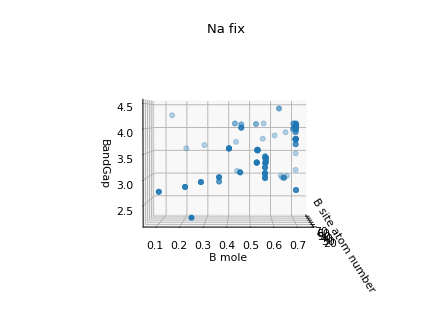

<IPython.core.display.Javascript object>


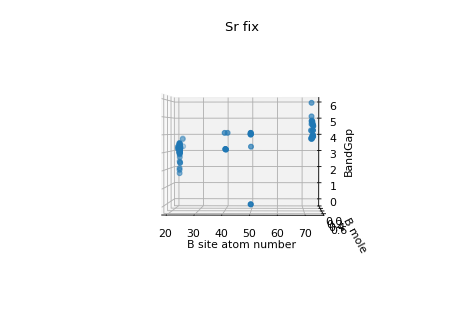

<IPython.core.display.Javascript object>


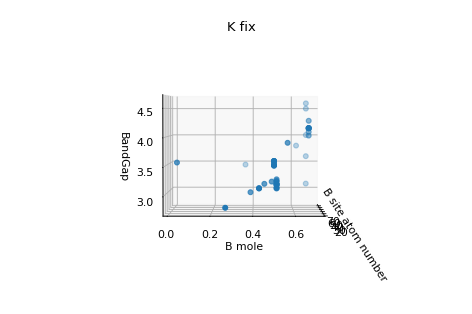

<IPython.core.display.Javascript object>


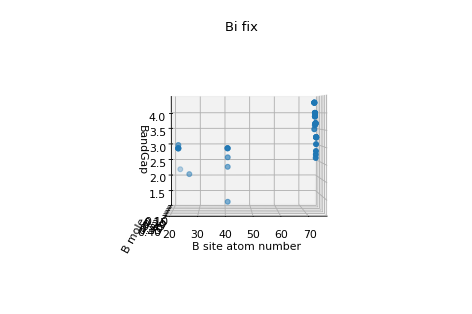

<IPython.core.display.Javascript object>


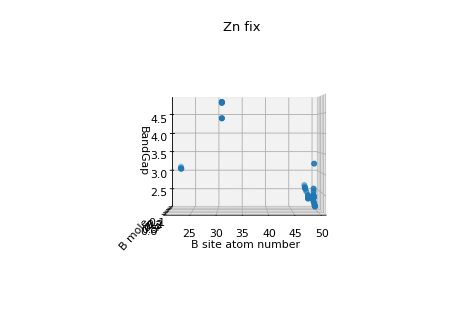

<IPython.core.display.Javascript object>


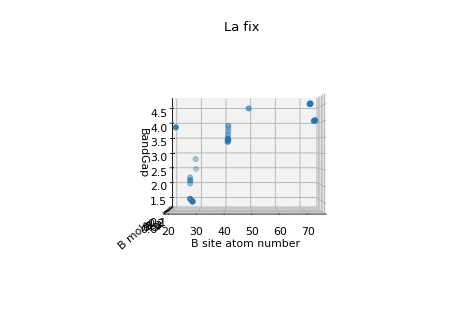

In [89]:
###### Aサイトの金属を変えて一気に可視化したい

metals = ['Na', 'Sr', 'K', 'Bi', 'Zn', 'La'] 
for metal in metals:
    df1 = df[df['A'] == metal]
    df1.insert(col_name.index('B')+1,
               col_dic['B'][1],
               [atom_num_dic[i] for i in df1['B']])
    lisz = [df1['BandGap'].fillna(0)]
    lisx = [df1[col_dic['B'][1]]]
    lisy = [df1[col_dic['B'][0]]]
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter3D(lisx,lisy,lisz, )
    ax.set(xlabel = 'B site atom number', ylabel = col_dic['B'][0], zlabel = 'BandGap', title = metal+' fix')
    ax.invert_xaxis()
    df1.corr()

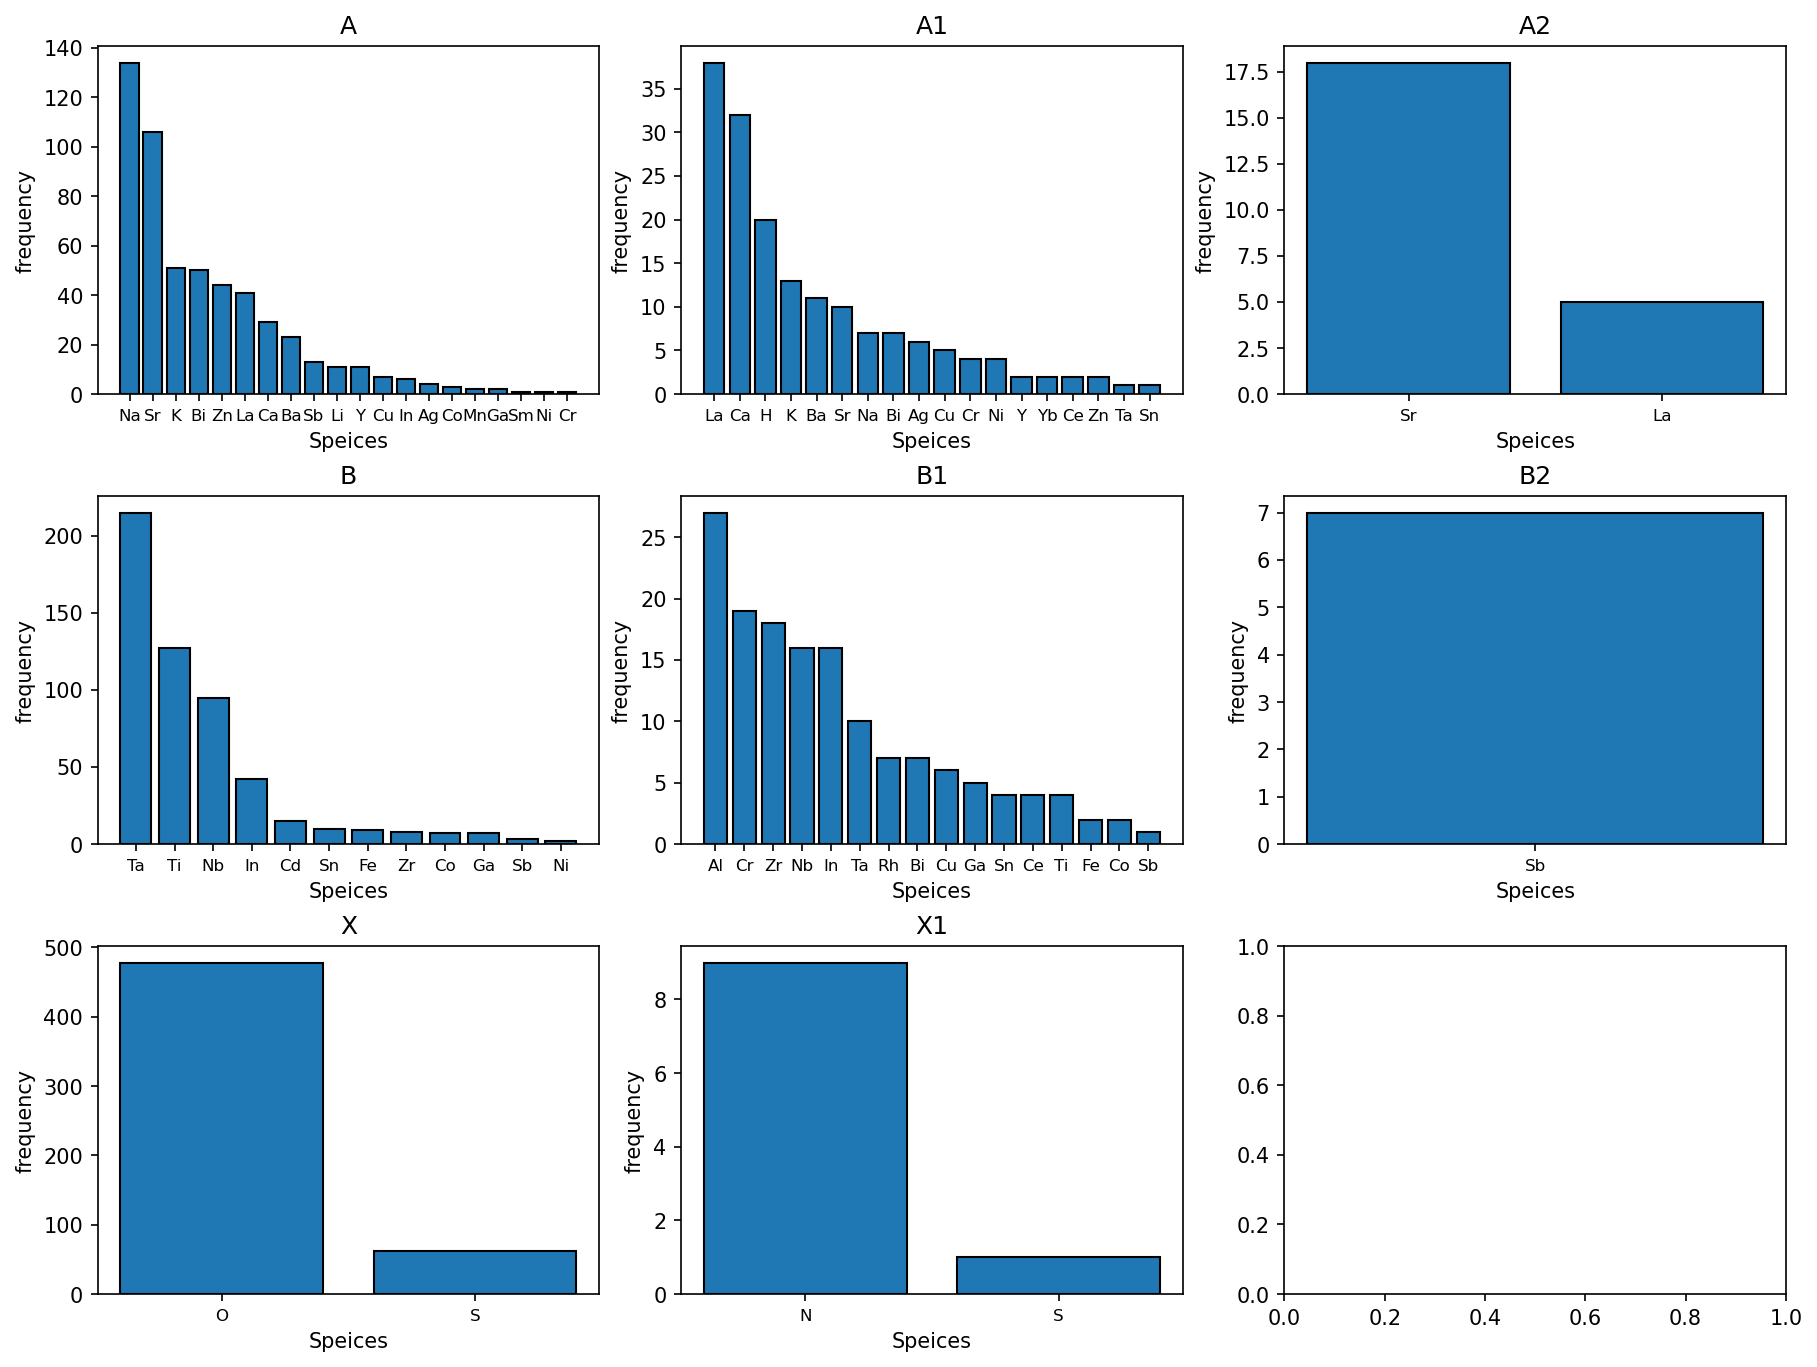

In [38]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = subplots(3, 3, figsize = (12, 9), dpi = 150, constrained_layout = True)
dic = {"A":ax1,
       "A1":ax2,
       "A2":ax3,
       "B":ax4,
       "B1":ax5,
       "B2":ax6,
       "X":ax7,
       "X1":ax8}
for i in dic.keys():
    lis1 = []
    lis2 = []
    for index, value in df[i].dropna().value_counts().iteritems():
        lis1.append(index)
        lis2.append(value)
    lis3 = list(range(len(lis1)))
    dic[i].bar(lis3, lis2, tick_label=lis1, align="center",edgecolor = 'black')
    #x軸の目盛りのサイズを指定
    dic[i].tick_params(axis = "x", labelsize = 8)
    #軸のラベル及び、タイトル設定
    dic[i].set(xlabel = 'Speices', ylabel = 'frequency',title = i)
    

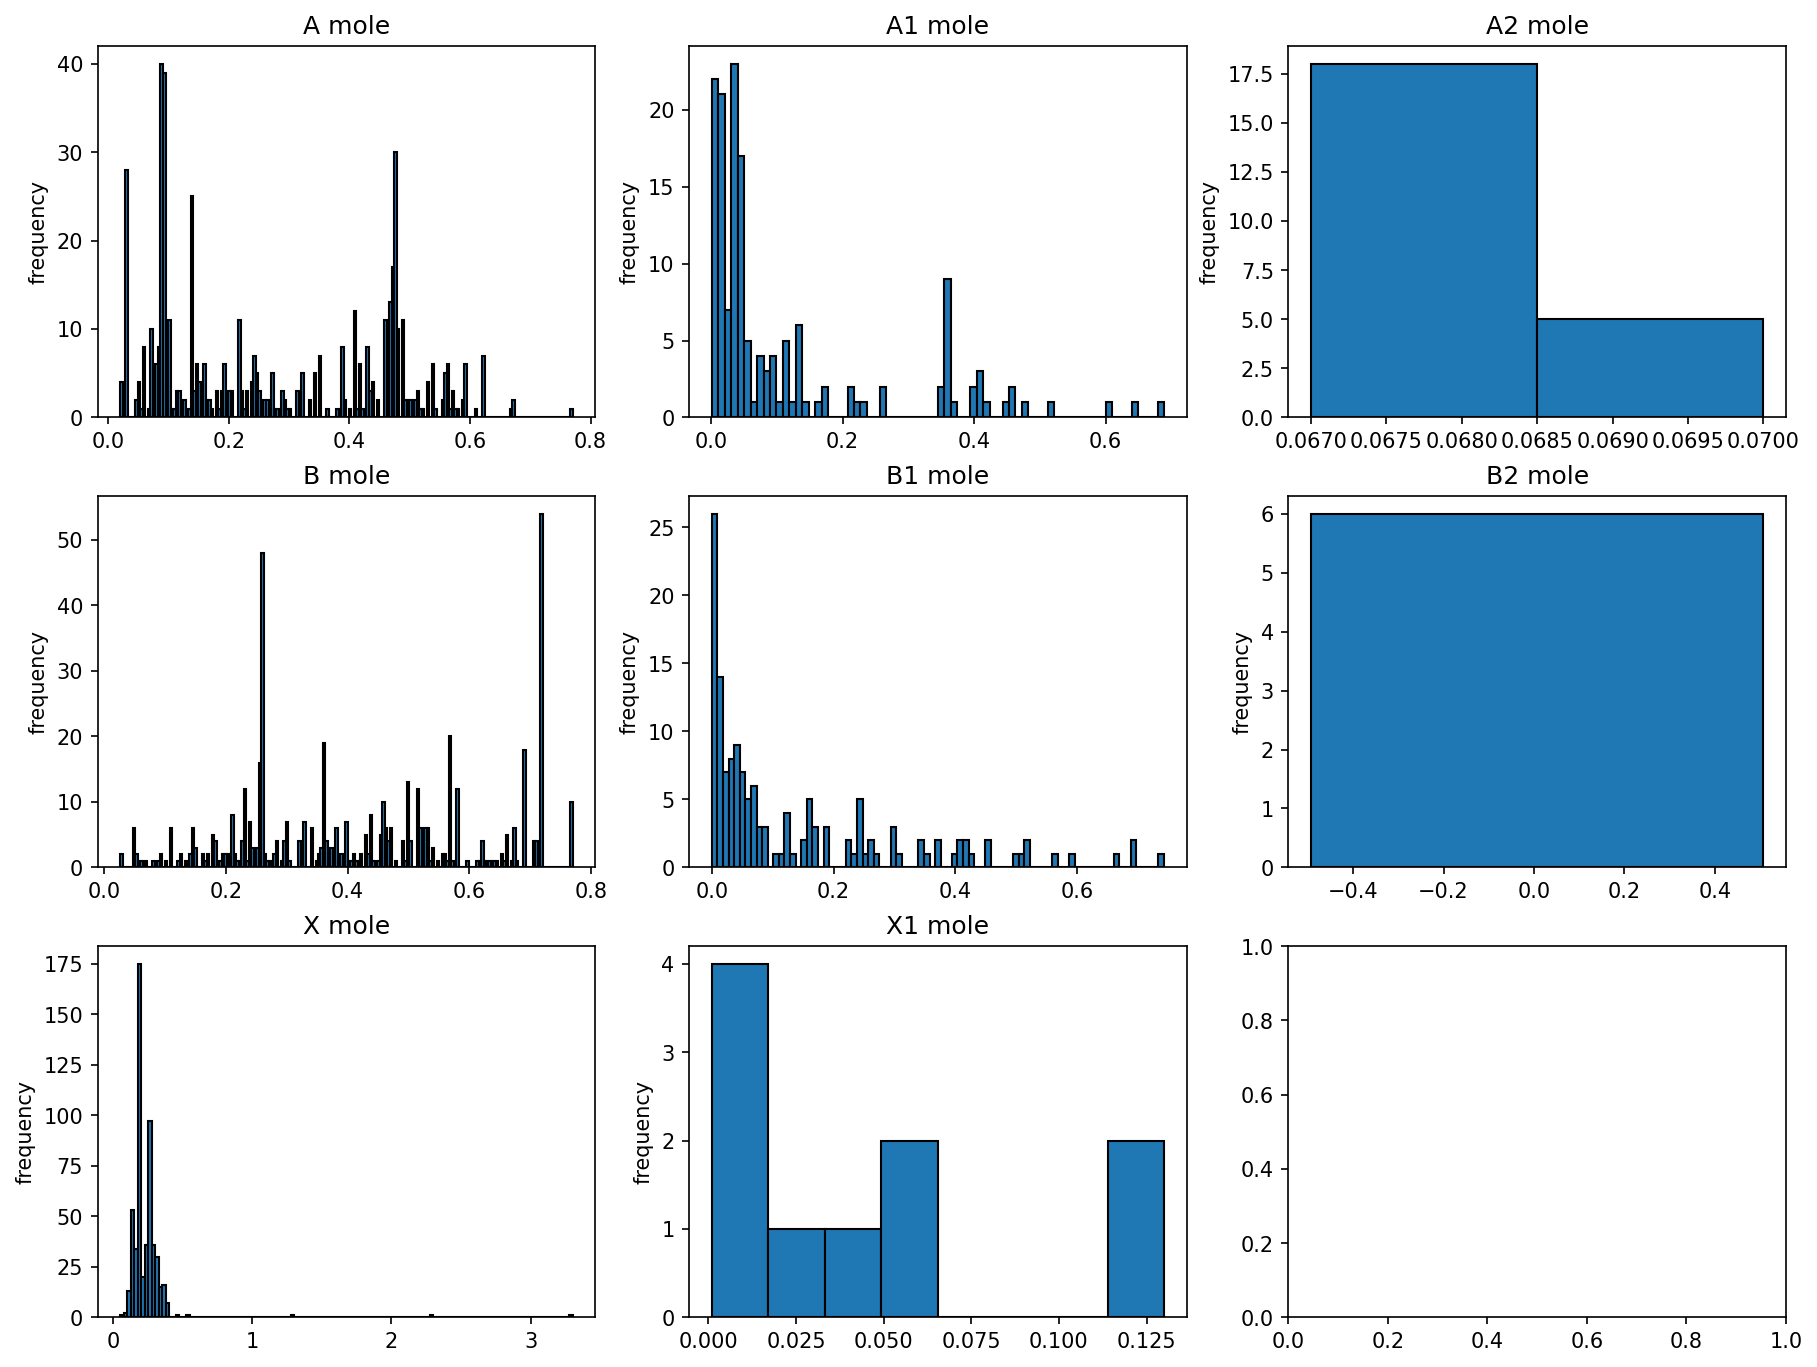

In [47]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = subplots(3, 3, figsize = (12, 9), dpi = 150, constrained_layout = True)
dic = {"A mole":ax1,
       "A1 mole":ax2,
       "A2 mole":ax3,
       "B mole":ax4,
       "B1 mole":ax5,
       "B2 mole":ax6,
       "X mole":ax7,
       "X1 mole":ax8}
lis2 = ["A mole","A1 mole","A2 mole","B mole","B1 mole","B2 mole","X mole","X1 mole"]
for i in dic.keys():
    df[i].describe()
    bins = len(set(df[i].dropna()))
    dic[i].hist(df[i].dropna(), bins = bins, edgecolor = 'black')
    dic[i].set(ylabel = 'frequency',title = i )

In [43]:
df["B2 mole"].value_counts()

0.007    6
Name: B2 mole, dtype: int64